# **Step 1: Import necessary libraries**


In [19]:
import nltk
from nltk.corpus import stopwords, gutenberg
from nltk.tokenize import word_tokenize, sent_tokenize
import re
from gensim.models import Word2Vec
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np

In [20]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('gutenberg')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package gutenberg to /root/nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

# **Step 2: Prepare the corpus**


### *Loading a sample corpus from NLTK (here, Jane Austen's "Emma")*

In [21]:
raw_text = gutenberg.raw('austen-emma.txt')

### *Preprocess text*

In [22]:
def preprocess_text(text):
    stop_words = set(stopwords.words('english'))
    sentences = sent_tokenize(text)
    cleaned_sentences = []

    for sent in sentences:
        sent = sent.lower()
        sent = re.sub(r'[^a-zA-Z\s]', '', sent)
        tokens = word_tokenize(sent)
        filtered_tokens = [word for word in tokens if word not in stop_words and len(word) > 1]
        if filtered_tokens:
            cleaned_sentences.append(filtered_tokens)

    return cleaned_sentences

In [23]:
corpus = preprocess_text(raw_text)

# **Step 3: Train Word2Vec Model**

In [24]:
model = Word2Vec(sentences=corpus, vector_size=100, window=5, min_count=2, workers=4, sg=1)

# **Step 4: Explore Embeddings**

### *a. Most similar words*

In [25]:
print("Most similar words to 'emma':")
print(model.wv.most_similar('emma'))

Most similar words to 'emma':
[('obliged', 0.9881818294525146), ('yes', 0.9880140423774719), ('understand', 0.9877790212631226), ('carriage', 0.9867585301399231), ('hear', 0.9865809679031372), ('believe', 0.9865036010742188), ('sir', 0.9864490628242493), ('smiling', 0.9862954616546631), ('saw', 0.9859692454338074), ('tea', 0.9856665134429932)]



### *b. Similarity score between two words*

In [26]:
print("\nSimilarity between 'emma' and 'harriet':", model.wv.similarity('emma', 'harriet'))


Similarity between 'emma' and 'harriet': 0.9839056


# **Step 5: Visualize Word Vectors using t-SNE**

In [27]:
def visualize_embeddings(model, words):
    word_vectors = [model.wv[word] for word in words if word in model.wv]
    labels = [word for word in words if word in model.wv]

    tsne = TSNE(n_components=2, random_state=0, perplexity=5)
    reduced_vectors = tsne.fit_transform(np.array(word_vectors))  # Fix applied here

    plt.figure(figsize=(10, 6))
    for i, label in enumerate(labels):
        x, y = reduced_vectors[i, :]
        plt.scatter(x, y)
        plt.annotate(label, (x, y), fontsize=12)
    plt.title("t-SNE visualization of Word Embeddings")
    plt.show()

# **Example visualization for selected words**

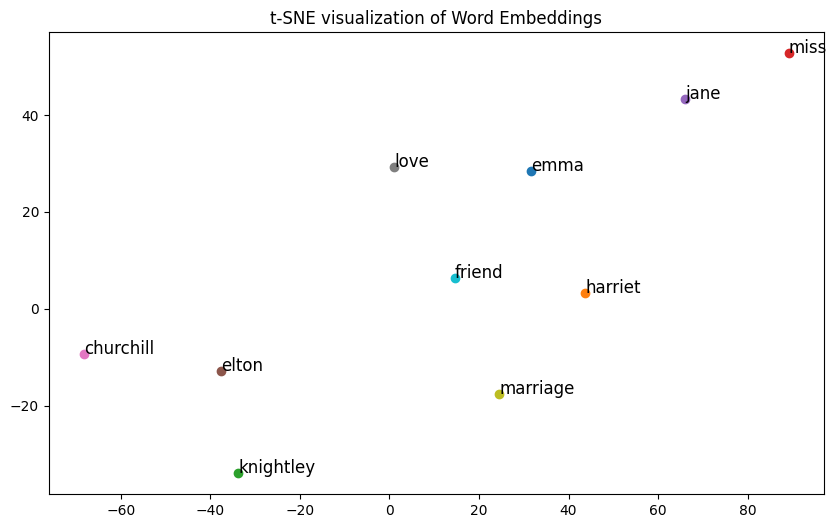

In [28]:
words_to_visualize = ['emma', 'harriet', 'knightley', 'miss', 'jane', 'elton', 'churchill', 'love', 'marriage', 'friend']
visualize_embeddings(model, words_to_visualize)